 QUESTION 3-
 Use Decision Tree(DT) and Gaussian Naive Bayes (GNB) classifier to train
Dataset 1. 

Split the data into 60-20-20 train-val-test splits. Implement K-Fold cross validation for both GNB and DT.





(a) Save the best model, load the saved model to predict the results on the test data (2 points).

(b) Evaluate testing data on the basis of accuracy, precision, recall, F1-Score,
plot ROC-curve and confusion matrix (1 point).

(c) Find optimal depth as a parameter in-case of DT using Grid Search and use
K-Fold cross validation to validate it (1 point).

(d) For DT plot training and validation accuracy plot with respect to tree depth
and write your analysis(1 point).

In [1]:
#importing file to colab

from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [82]:
#Import libraries

import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from pandas import DataFrame
import matplotlib.pyplot as plot
import numpy as np
%matplotlib inline
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model, tree, ensemble
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [52]:
#reading the file
df = pd.read_csv('abalone.csv')  

In [53]:
#different methods to understand the Abalone data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [54]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [55]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [56]:
#checking for null values in the dataset
df.isnull().sum(axis = 0)

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [58]:
#The task is to predict the age (number of rings) of abalone from physical measurements.

# convert categorical "Sex" into numeric 
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [59]:
#shape of the transformed matrix
df.shape

(4177, 11)

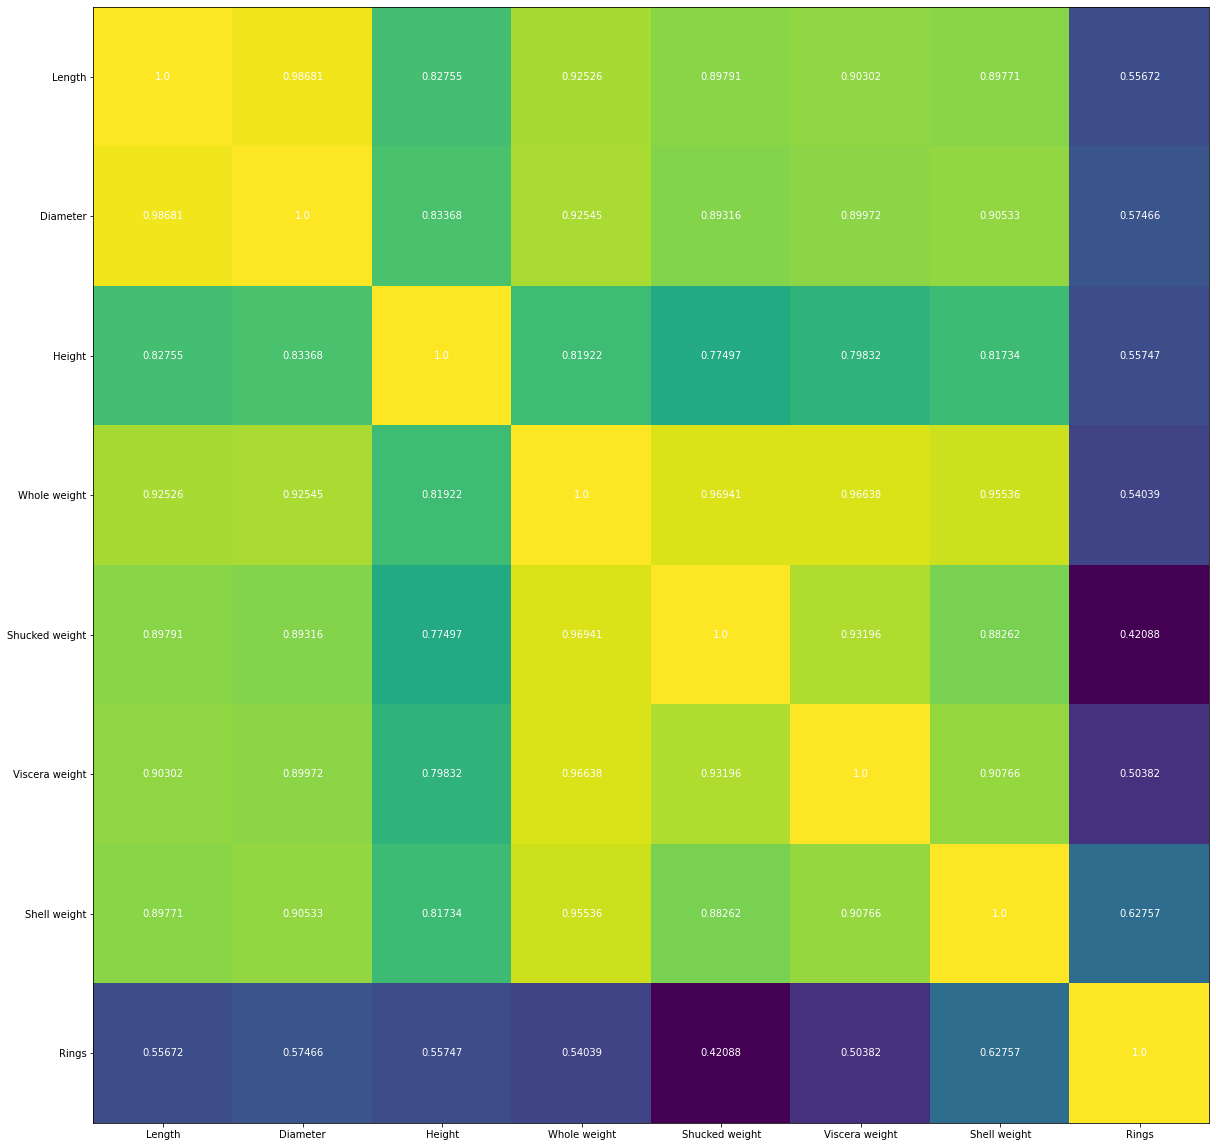

In [63]:
#understanding correlation between features

#find the correlation matrix
corMatrix = pd.DataFrame(df.iloc[:,:8].corr()).values
corMatrix = np.around(corMatrix, decimals = 5)

#visualize the correlation matrix of abalone dataset
columns = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
fig, ax = plot.subplots(figsize = (20,50))
im = ax.imshow(corMatrix)

ax.set_xticks(range(len(corMatrix)))
ax.set_yticks(range(len(corMatrix)))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)

for i in range(8):
    for j in range(8):
        text = ax.text(j, i, corMatrix[i, j],ha="center", va="center", color="w")

In [65]:
#print correlation with target variable ie. "Rings"
feature_importance = pd.DataFrame(df.iloc[:,:8].corr()).iloc[:-1, -1].sort_values(ascending=False)
print('Features in Descending Order of their Importance are as follows-', list(feature_importance.index))

Features in Descending Order of their Importance are as follows- ['Shell weight', 'Diameter', 'Height', 'Length', 'Whole weight', 'Viscera weight', 'Shucked weight']


In [66]:
#the target feature is discrete
set(df['Rings'])

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}

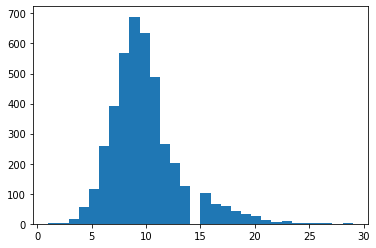

In [68]:
# plotting the distribution of target (Rings)
n, bins, patches = plot.hist(df['Rings'], bins = 30)

In [69]:
# Separate the target/label(y) value from features(x)
y = df["Rings"]
x = df.drop(columns = "Rings")

print(x.shape)
print(y.shape)

(4177, 10)
(4177,)


In [71]:
#Split the data into 60-20-20 train-val-test splits.

seed = 1000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.4, random_state=seed)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=seed)

print(df.shape)

print(x_train.shape)
print(y_train.shape)

print(x_validation.shape)
print(y_validation.shape)

print(x_test.shape)
print(y_test.shape)

(4177, 11)
(2506, 10)
(2506,)
(835, 10)
(835,)
(836, 10)
(836,)


In [74]:
#Decision Tree Classifier Model Score Using KFold

#k=5
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

count = 1

for train_index, test_index in kf.split(x_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count+=1

#DT Classifier Model Score calculation
scoreDT = cross_val_score(tree.DecisionTreeClassifier(random_state= 42), x_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {scoreDT}')
print(f'Average Cross-validation score of DT: {"{:.2f}".format(scoreDT.mean())}')

Fold:6, Train set: 2004, Test set:502
Fold:6, Train set: 2005, Test set:501
Fold:6, Train set: 2005, Test set:501
Fold:6, Train set: 2005, Test set:501
Fold:6, Train set: 2005, Test set:501
Scores for each fold are: [0.22709163 0.21756487 0.18163673 0.19161677 0.20758483]
Average Cross-validation score of DT: 0.21


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average Cross-validation score of DT: 0.21


In [86]:
#to train a Gaussian Naive Bayes classifier on the train dataset

#instantiating the GNB model
gnb = GaussianNB()

#fit the model
gnb.fit(x_train, y_train)
print(gnb)

#make predictions
y_pred = gnb.predict(x_test)
print(y_pred)

GaussianNB(priors=None, var_smoothing=1e-09)
[ 8 18  8 23 11  7  6 23  7 23 23  7 11  9 11  5 23 22 10 23 23 22 22 11
  7  4 23 23  4  6 23 22  6 22 22  7 11  7  4 23  8 23  6  6 23 23 23 22
  8 11 23  7 22  4  8  8 23 22  6  7  7 22 22  8 11  4 23  6 11  4 23  8
 23  8 22 23 23  8  5  8  8  7 22  6  6  7  9 23  6 23  7 22 22  8  4  8
  3 23  5 23 23 11 23 23  6  7 11 23 23 23 23  7 22 23 23 23 23 11 23 23
 11 22  6  6 23 22 11  8  8 23 11  8  4 23  6  7 23  6 23 23 11  8 22 23
 11  8 23 22 23 23 11 23  5  7  4 23 11 11 11 11  6 22  8 23 11 23 22 23
 22 23 23 11 11 22 23 22  4 11  4  6 11 23 22  6 22 11  6 22 11  8 22  7
 23  6 23  8  8 22 23 23  8  6 23  9 23  8 23 22  6 23  8  6 23  7  7 23
 11  6 11 11 23  3 23 12 23  6 23 23 11 22  6 11 23  7 23  6 23 11 23 23
 23 11  7  8  8  8 22 22 22  6 22 23 23 23 23  8 22  7 23  7 23 23 22  7
  7  8 23  6 23 22 22  7 22 22 22  8 11 18 22 11  8  5  8 22 22 11  8 23
 23 23 23  8 23 23 12  7  5 11 11 23  6 22 23  4  7 23  8 23 23 22  7 23
 22  6

In [89]:
# Applying K-Fold Cross Validation to GNB

scoresGNB = cross_val_score(gnb, x_train, y_train, cv = kf, scoring='accuracy')

print('Cross-validation scores:{}'.format(scoresGNB))
print(f'Average Cross-validation score: {"{:.2f}".format(scoresGNB.mean())}')


Cross-validation scores:[0.10159363 0.12774451 0.14770459 0.15968064 0.14570858]
Average Cross-validation score: 0.14


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average Cross-validation score of GNB: 0.14


#Answer(a) 

#DT Classifier is a better model than GNB Classifier, since the Average Cross-validation score of DT: 0.21 > Average Cross-validation score of GNB: 0.14


#(c) Find optimal depth as a parameter in-case of DT using Grid Search and use K-Fold cross validation to validate it

In [83]:
max_depth = [1,2,3,4,5,6,7,8,9,10,12,13,14,15]

In [85]:
#Model Tuning using KFold for optimal depth

for val in max_depth:
    clf = tree.DecisionTreeClassifier(max_depth= val, random_state= 42)
    clf.fit(x_train, y_train)
    scoreDEP = cross_val_score(clf, x_train, y_train, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(scoreDEP.mean())}')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average score(1): 0.208
Average score(2): 0.241
Average score(3): 0.256
Average score(4): 0.252


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average score(5): 0.251
Average score(6): 0.251
Average score(7): 0.255


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average score(8): 0.250
Average score(9): 0.239


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average score(10): 0.227
Average score(12): 0.219


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average score(13): 0.219
Average score(14): 0.209
Average score(15): 0.214


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


#Answer (c)- For Abalone dataset, Depth = 3 for a good DT, since Average score(3): 0.256 is maximum for max_depth=3

#(b) Evaluate testing data on the basis of accuracy, precision, recall, F1-Score, plot ROC-curve and confusion matrix (1 point).


In [81]:
#to check class distribution in the test datasetset
y_test.value_counts()

9     145
10    131
8      92
11     90
7      85
12     61
6      51
13     43
14     25
15     24
5      24
18     12
4      11
17      9
16      9
19      7
21      5
20      4
3       1
2       1
29      1
26      1
22      1
23      1
25      1
1       1
Name: Rings, dtype: int64

In [94]:
#Evaluating the GNB classifier


#Checking the accuracy score of GNB classifier using train, test and val dataset
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

#Compare the validation-set and test-set accuracy¶
y_pred_val = gnb.predict(x_validation)
print('Validation-set accuracy score: {0:0.4f}'. format(accuracy_score(y_validation, y_pred_val)))

# print the scores on training, val and test set
print('Training set score: {:.4f}'.format(gnb.score(x_train, y_train)))
print('Validation set score: {:.4f}'.format(gnb.score(x_validation, y_validation)))
print('Test set score: {:.4f}'.format(gnb.score(x_test, y_test)))

Model accuracy score: 0.1077
Validation-set accuracy score: 0.1449
Training set score: 0.1524
Validation set score: 0.1449
Test set score: 0.1077


In [100]:
#Evaluating the DT classifier


#Validate the DT classifier
print('Validation set score: {:.4f}'.format(clf.score(x_validation, y_validation)))

#Evaluate the DT classifier
print('Test set score: {:.4f}'.format(clf.score(x_test, y_test)))

Validation set score: 0.1940
Test set score: 0.2129


In [103]:
# Print the Confusion Matrix 
from sklearn.metrics import confusion_matrix


#make predictions for GNB classifier
#y_pred = gnb.predict(x_test)
#print(y_pred)

#make predictions for DT classifier
y_pred_DT= clf.predict(x_test)
print(y_pred_DT)

#for DT classifier
cmDT = confusion_matrix(y_test, y_pred_DT)

#for GNB classifier
cmGNB = confusion_matrix(y_test, y_pred)

print('Confusion matrix for DT\n\n', cmDT)
print('******************************************************')
print('Confusion matrix for GNB\n\n', cmGNB)

[ 8 13  8  8 11  7  7 10  9 11 10 14 11 14 11  6 12  9 10 11 10  6 17 18
  8  5  9 10  5  7  9 10 11 10 10  8 10 15  4 11  8 12  6  6  9 10 11 14
  9 13  9  7 13  6  9 10  8  8  7  7 12 13  7  7 11  8 15  8 18  5  9  9
 10  6 11  8 16  7  6  8 12 10 11  7  6  8 14 10  5 11  7 11  8  9  6  9
  3 13  6 15 10  9 13 10  7  9 11 14  9 13 10 10  8 11  9  8 13 13  8 13
  9 10  7  6 10 10  9  9  9 11 11  9  5  8  6 12 11  6  9 12 11  9  6 23
  9  8  9 12 11 14 10 11  6  8  6  8 11 10 14  9  7 10  7 11  9 23 10 11
 11 15 12 17 10  9 12 10  7 11  7  7 10 14 12  7 16 10  7 17 11  8 12  9
 11  8  9 10  8 20 12 16  7  8 10 10 11 12 11 15  6 11  8  7 13  7  6 11
 10  4 11 11  8  4 13 12 10  7  9 11 11 15  8  9 11  7  7  6 10 13  9  9
 15 18  7 13  8 11  9 13 10  7 20 10  9 10  9  7 11  7 12  8  8 10 14  8
  7  8  7  6  7 11 11 10 11  9  8  9 14 12 10 10  9  6  9 10 10 11  8  9
  9 10 10  8  9 13 12 10  9 10 11 14  7  9  9  6 10  7 10 16 12  8 12  9
 11  7 10 27  6 10  9  9  9  9 15  5 11  8  6 10 11

In [108]:
#model evaluation of GNB
accuracyGNB = accuracy_score(y_test,y_pred)*100
print("Accuracy of GNB classifier is ", accuracyGNB)

# summarize the fit of the GNB model
print(metrics.classification_report(y_test,y_pred))

Accuracy of GNB classifier is  10.76555023923445
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.09      1.00      0.17         1
           4       0.10      0.36      0.15        11
           5       0.05      0.04      0.05        24
           6       0.21      0.35      0.26        51
           7       0.19      0.18      0.18        85
           8       0.23      0.24      0.24        92
           9       0.25      0.03      0.05       145
          10       0.00      0.00      0.00       131
          11       0.26      0.24      0.25        90
          12       0.25      0.02      0.03        61
          13       0.00      0.00      0.00        43
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        24
          16       0.00      0.00      0.00         9
          17       0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
#model evaluation of DT
accuracyDT = accuracy_score(y_test,y_pred_DT)*100
print("Accuracy of DT classifier is ", accuracyDT)

# summarize the fit of the GNB model
print(metrics.classification_report(y_test,y_pred_DT))

Accuracy of DT classifier is  21.291866028708135
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.30      0.27      0.29        11
           5       0.42      0.33      0.37        24
           6       0.27      0.29      0.28        51
           7       0.27      0.31      0.29        85
           8       0.22      0.26      0.24        92
           9       0.26      0.23      0.24       145
          10       0.22      0.21      0.22       131
          11       0.22      0.26      0.23        90
          12       0.10      0.08      0.09        61
          13       0.18      0.16      0.17        43
          14       0.06      0.08      0.07        25
          15       0.14      0.12      0.13        24
          16       0.00      0.00      0.00         9
          17       0.12      0.1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Answer (d)

#Analysis- DT classifier with depth= 3 is a verified model (keeping k=5)